In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/content/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df[df['Outcome']==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [8]:
len(df[df['Outcome']==1]),len(df[df['Outcome']==0])

(268, 500)

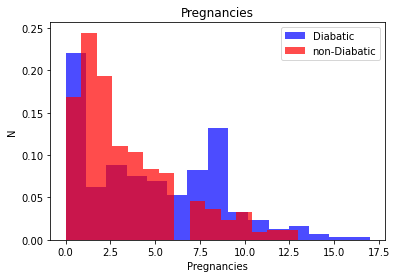

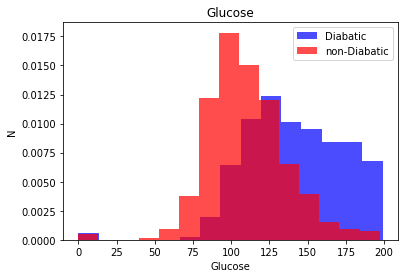

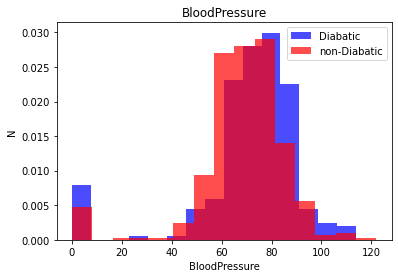

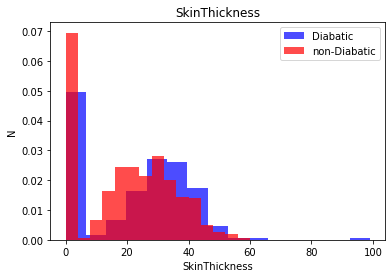

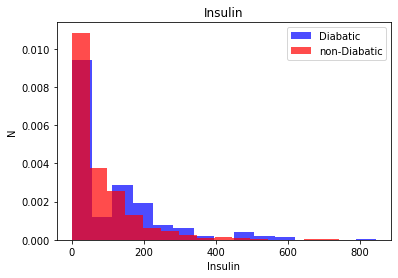

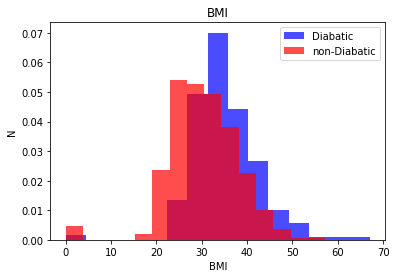

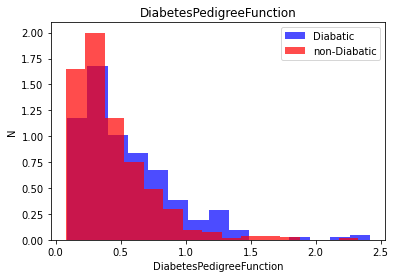

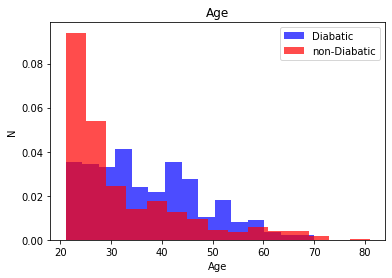

In [9]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==1][label], color ='blue', label='Diabatic', alpha=0.7, density=True, bins = 15)
  plt.hist(df[df['Outcome']==0][label], color='red', label='non-Diabatic', alpha=0.7, density=True, bins = 15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [34]:
x= df[df.columns[:-1]].values
y=df[df.columns[-1]].values

In [38]:
x.shape,y.shape

((768, 8), (768,))

In [39]:
scaler = StandardScaler()
x= scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [36]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color ='blue', label='Diabatic', alpha=0.7, density=True, bins = 15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='red', label='non-Diabatic', alpha=0.7, density=True, bins = 15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [44]:
over = RandomOverSampler()
x, y= over.fit_resample(x, y)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [45]:
len(transformed_df[transformed_df['Outcome']==1]),len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [46]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size= 0.4,random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size= 0.5,random_state=0)

In [47]:
model = tf.keras.Sequential([
                              tf.keras.layers.Dense(20, activation='relu'),
                              tf.keras.layers.Dense(20, activation='relu'),
                              tf.keras.layers.Dense(1 , activation="sigmoid")
])

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'])

In [49]:
model.evaluate(x_valid, y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.7809 - accuracy: 0.4350


[0.7808648943901062, 0.4350000023841858]

In [51]:
model.fit(x_train, y_train, batch_size=20, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
30/30 [==============================] - 0s 4ms/step - loss: 0.4729 - accuracy: 0.7617 - val_loss: 0.4844 - val_accuracy: 0.7750
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4698 - accuracy: 0.7567 - val_loss: 0.4824 - val_accuracy: 0.7800
Epoch 3/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.7600 - val_loss: 0.4837 - val_accuracy: 0.7750
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4650 - accuracy: 0.7700 - val_loss: 0.4801 - val_accuracy: 0.7700
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4624 - accuracy: 0.7733 - val_loss: 0.4795 - val_accuracy: 0.7850
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4602 - accuracy: 0.7733 - val_loss: 0.4798 - val_accuracy: 0.7800
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4594 - accuracy: 0.7733 - val_loss: 0.4792 - val_accuracy: 0.7750
Epoch 8/20
30/30 [==

In [53]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7600


[0.4756018817424774, 0.7599999904632568]

In [58]:
model.predict(x_test[1:5])

1/1 [==============================] - 0s 42ms/step


array([[0.7662884 ],
       [0.22804107],
       [0.69618636],
       [0.4921745 ]], dtype=float32)